In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [2]:
#Base principal
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235449 entries, 0 to 235448
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    235449 non-null  object 
 1   continent                                   222165 non-null  object 
 2   location                                    235449 non-null  object 
 3   date                                        235449 non-null  object 
 4   total_cases                                 222234 non-null  float64
 5   new_cases                                   221975 non-null  float64
 6   new_cases_smoothed                          220776 non-null  float64
 7   total_deaths                                202942 non-null  float64
 8   new_deaths                                  202868 non-null  float64
 9   new_deaths_smoothed                         201688 non-null  float64
 

In [3]:
df_br = df.loc[:, ['date', 'total_cases', 'new_cases', 'new_cases_smoothed','total_cases_per_million',
                   'new_cases_per_million', 'new_cases_smoothed_per_million', 
                   'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred','new_vaccinations_smoothed',
                   'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                   'icu_patients', 'icu_patients_per_million',
                   'hosp_patients', 'hosp_patients_per_million']].loc[df.location == 'Brazil']

In [4]:
# verificando colunas vazias
faltantes = df_br.isnull().sum()
display(df_br.shape)
display(faltantes)

(995, 18)

date                                     0
total_cases                              0
new_cases                                3
new_cases_smoothed                       8
total_cases_per_million                  0
new_cases_per_million                    3
new_cases_smoothed_per_million           8
total_vaccinations                     395
people_vaccinated                      399
people_fully_vaccinated                415
total_vaccinations_per_hundred         395
new_vaccinations_smoothed              327
people_vaccinated_per_hundred          399
people_fully_vaccinated_per_hundred    415
icu_patients                           995
icu_patients_per_million               995
hosp_patients                          995
hosp_patients_per_million              995
dtype: int64

In [5]:
# retirando colunas vazias
df_br1 = df_br.copy()

df_br.drop('icu_patients', axis=1, inplace=True)
df_br.drop('icu_patients_per_million', axis=1, inplace=True)
df_br.drop('hosp_patients', axis=1, inplace=True)
df_br.drop('hosp_patients_per_million', axis=1, inplace=True)
display(df_br)


,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,new_vaccinations_smoothed,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
28728,2020-02-26,1.0,1.0,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28729,2020-02-27,1.0,0.0,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28730,2020-02-28,1.0,0.0,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28731,2020-02-29,2.0,1.0,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28732,2020-03-01,2.0,0.0,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29718,2022-11-12,34908198.0,0.0,8447.857,162127.304,0.000,39.235,NaN,NaN,NaN,NaN,1877.0,NaN,NaN
29719,2022-11-13,34908198.0,0.0,8447.857,162127.304,0.000,39.235,NaN,NaN,NaN,NaN,2041.0,NaN,NaN
29720,2022-11-14,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,2205.0,87.04,80.05
29721,2022-11-15,34908198.0,0.0,7529.429,162127.304,0.000,34.970,NaN,NaN,NaN,NaN,24749.0,NaN,NaN


In [6]:
df_br.tail()

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,new_vaccinations_smoothed,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
29718,2022-11-12,34908198.0,0.0,8447.857,162127.304,0.000,39.235,NaN,NaN,NaN,NaN,1877.0,NaN,NaN
29719,2022-11-13,34908198.0,0.0,8447.857,162127.304,0.000,39.235,NaN,NaN,NaN,NaN,2041.0,NaN,NaN
29720,2022-11-14,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,2205.0,87.04,80.05
29721,2022-11-15,34908198.0,0.0,7529.429,162127.304,0.000,34.970,NaN,NaN,NaN,NaN,24749.0,NaN,NaN
29722,2022-11-16,34938073.0,29875.0,11797.286,162266.056,138.751,54.791,473450995.0,187678650.0,172674382.0,219.89,47292.0,87.17,80.20


In [7]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 28728 to 29722
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 995 non-null    object 
 1   total_cases                          995 non-null    float64
 2   new_cases                            992 non-null    float64
 3   new_cases_smoothed                   987 non-null    float64
 4   total_cases_per_million              995 non-null    float64
 5   new_cases_per_million                992 non-null    float64
 6   new_cases_smoothed_per_million       987 non-null    float64
 7   total_vaccinations                   600 non-null    float64
 8   people_vaccinated                    596 non-null    float64
 9   people_fully_vaccinated              580 non-null    float64
 10  total_vaccinations_per_hundred       600 non-null    float64
 11  new_vaccinations_smoothed 

In [8]:
#preenchendo os valores vazios com as resultado apresentado no index anterior
#foi escolhida essa forma de preenchimento, pois por ser média, o valor que estaria mais próximo seria ao do dia anterior
df_br['total_vaccinations'].fillna(method='ffill', inplace = True)
df_br['people_vaccinated'].fillna(method='ffill', inplace = True)
df_br['people_fully_vaccinated'].fillna(method='ffill', inplace = True)
df_br['total_vaccinations_per_hundred'].fillna(method='ffill', inplace = True)
df_br['people_vaccinated_per_hundred'].fillna(method='ffill', inplace = True)
df_br['people_fully_vaccinated_per_hundred'].fillna(method='ffill', inplace = True)
df_br['new_vaccinations_smoothed'].fillna(method='ffill', inplace = True)

In [9]:
#o que não foi preenchido inicialmente foi colocado 0
df_br['total_vaccinations'].fillna(value = 0, inplace = True)
df_br['people_vaccinated'].fillna(value = 0, inplace = True)
df_br['people_fully_vaccinated'].fillna(value = 0, inplace = True)
df_br['total_vaccinations_per_hundred'].fillna(value = 0, inplace = True)
df_br['people_vaccinated_per_hundred'].fillna(value = 0, inplace = True)
df_br['people_fully_vaccinated_per_hundred'].fillna(value = 0, inplace = True)
df_br['new_vaccinations_smoothed'].fillna(value = 0, inplace = True)

In [10]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 28728 to 29722
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 995 non-null    object 
 1   total_cases                          995 non-null    float64
 2   new_cases                            992 non-null    float64
 3   new_cases_smoothed                   987 non-null    float64
 4   total_cases_per_million              995 non-null    float64
 5   new_cases_per_million                992 non-null    float64
 6   new_cases_smoothed_per_million       987 non-null    float64
 7   total_vaccinations                   995 non-null    float64
 8   people_vaccinated                    995 non-null    float64
 9   people_fully_vaccinated              995 non-null    float64
 10  total_vaccinations_per_hundred       995 non-null    float64
 11  new_vaccinations_smoothed 

In [11]:
df_casos = df_br[['date', 'total_cases', 'new_cases', 'new_cases_smoothed','total_cases_per_million',
                   'new_cases_per_million', 'new_cases_smoothed_per_million', 
                   'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred',
                   'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed']]
df_casos.head(10)

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed
28728,2020-02-26,1.0,1.0,NaN,0.005,0.005,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28729,2020-02-27,1.0,0.0,NaN,0.005,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28730,2020-02-28,1.0,0.0,NaN,0.005,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28731,2020-02-29,2.0,1.0,NaN,0.009,0.005,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28732,2020-03-01,2.0,0.0,NaN,0.009,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28733,2020-03-02,2.0,0.0,0.286,0.009,0.000,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28734,2020-03-03,2.0,0.0,0.286,0.009,0.000,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28735,2020-03-04,4.0,2.0,0.429,0.019,0.009,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28736,2020-03-05,4.0,0.0,0.429,0.019,0.000,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28737,2020-03-06,13.0,9.0,1.714,0.060,0.042,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_casos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 28728 to 29722
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 995 non-null    object 
 1   total_cases                          995 non-null    float64
 2   new_cases                            992 non-null    float64
 3   new_cases_smoothed                   987 non-null    float64
 4   total_cases_per_million              995 non-null    float64
 5   new_cases_per_million                992 non-null    float64
 6   new_cases_smoothed_per_million       987 non-null    float64
 7   total_vaccinations                   995 non-null    float64
 8   people_vaccinated                    995 non-null    float64
 9   people_fully_vaccinated              995 non-null    float64
 10  total_vaccinations_per_hundred       995 non-null    float64
 11  people_vaccinated_per_hund

In [ ]:
#Assim como casos e vacinados. Será feito dois tipos de preenchimento para: new_cases, new_cases_smoothed, new_cases_per_million e new_cases_smoothed_per_million
#O primeiro, ffill para valores NaN no meio da tabela serem preenchidos com os anteriores e após isso, preencher com 0 o que ainda está nulo, imaginando que sejam as datas iniciais
df_casos['new_cases'].fillna(method='ffill', inplace = True)
df_casos['new_cases_smoothed'].fillna(method='ffill', inplace = True)
df_casos['new_cases_per_million'].fillna(method='ffill', inplace = True)
df_casos['new_cases_smoothed_per_million'].fillna(method='ffill', inplace = True)

#preenchendo valores por zero
df_casos['new_cases'].fillna(value = 0, inplace = True)
df_casos['new_cases_smoothed'].fillna(value = 0, inplace = True)
df_casos['new_cases_per_million'].fillna(value = 0, inplace = True)
df_casos['new_cases_smoothed_per_million'].fillna(value = 0, inplace = True)

In [23]:
df_casos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 28728 to 29722
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 995 non-null    object 
 1   total_cases                          995 non-null    float64
 2   new_cases                            995 non-null    float64
 3   new_cases_smoothed                   995 non-null    float64
 4   total_cases_per_million              995 non-null    float64
 5   new_cases_per_million                995 non-null    float64
 6   new_cases_smoothed_per_million       995 non-null    float64
 7   total_vaccinations                   995 non-null    float64
 8   people_vaccinated                    995 non-null    float64
 9   people_fully_vaccinated              995 non-null    float64
 10  total_vaccinations_per_hundred       995 non-null    float64
 11  people_vaccinated_per_hund

In [24]:
df_casos.head(5)

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed
28728,2020-02-26,1.0,1.0,0.0,0.005,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28729,2020-02-27,1.0,0.0,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28730,2020-02-28,1.0,0.0,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28731,2020-02-29,2.0,1.0,0.0,0.009,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28732,2020-03-01,2.0,0.0,0.0,0.009,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_casos.tail(5)

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed
29718,2022-11-12,34908198.0,0.0,8447.857,162127.304,0.000,39.235,473127683.0,187399523.0,172351070.0,219.74,87.04,80.05,1877.0
29719,2022-11-13,34908198.0,0.0,8447.857,162127.304,0.000,39.235,473127683.0,187399523.0,172351070.0,219.74,87.04,80.05,2041.0
29720,2022-11-14,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,87.04,80.05,2205.0
29721,2022-11-15,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,87.04,80.05,24749.0
29722,2022-11-16,34938073.0,29875.0,11797.286,162266.056,138.751,54.791,473450995.0,187678650.0,172674382.0,219.89,87.17,80.20,47292.0


In [26]:
#df para casos antes da vacina
df_casos_pre = df_casos.loc[:28968,:].set_index('date')

In [27]:
#df para casos depois da vacina
df_casos_pos = df_casos.loc[28969:,:].set_index('date')
display(df_casos_pos)

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed
date,,,,,,,,,,,,,
2020-10-24,5384342.0,24984.0,22571.571,25006.987,116.035,104.831,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2020-10-25,5396596.0,12254.0,22600.571,25063.899,56.912,104.966,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2020-10-26,5415207.0,18611.0,22890.857,25150.336,86.437,106.314,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2020-10-27,5445189.0,29982.0,23778.857,25289.584,139.248,110.438,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2020-10-28,5473540.0,28351.0,24135.286,25421.257,131.673,112.094,0.0,0.0,0.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-12,34908198.0,0.0,8447.857,162127.304,0.000,39.235,473127683.0,187399523.0,172351070.0,219.74,87.04,80.05,1877.0
2022-11-13,34908198.0,0.0,8447.857,162127.304,0.000,39.235,473127683.0,187399523.0,172351070.0,219.74,87.04,80.05,2041.0
2022-11-14,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,87.04,80.05,2205.0


In [28]:
df_casos_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 2020-02-26 to 2020-10-23
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_cases                          241 non-null    float64
 1   new_cases                            241 non-null    float64
 2   new_cases_smoothed                   241 non-null    float64
 3   total_cases_per_million              241 non-null    float64
 4   new_cases_per_million                241 non-null    float64
 5   new_cases_smoothed_per_million       241 non-null    float64
 6   total_vaccinations                   241 non-null    float64
 7   people_vaccinated                    241 non-null    float64
 8   people_fully_vaccinated              241 non-null    float64
 9   total_vaccinations_per_hundred       241 non-null    float64
 10  people_vaccinated_per_hundred        241 non-null    float64
 11  people_fully_vaccinat

In [29]:
df_casos_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 2020-10-24 to 2022-11-16
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_cases                          754 non-null    float64
 1   new_cases                            754 non-null    float64
 2   new_cases_smoothed                   754 non-null    float64
 3   total_cases_per_million              754 non-null    float64
 4   new_cases_per_million                754 non-null    float64
 5   new_cases_smoothed_per_million       754 non-null    float64
 6   total_vaccinations                   754 non-null    float64
 7   people_vaccinated                    754 non-null    float64
 8   people_fully_vaccinated              754 non-null    float64
 9   total_vaccinations_per_hundred       754 non-null    float64
 10  people_vaccinated_per_hundred        754 non-null    float64
 11  people_fully_vaccinat

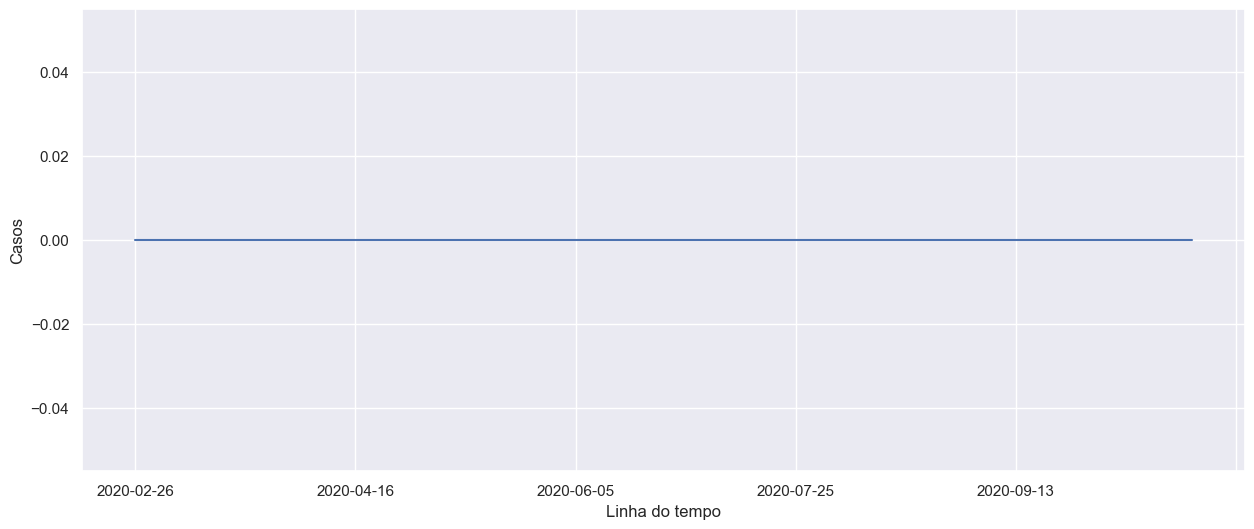

In [30]:
#veriricar se antes da vacina está de fato zerado
sns.set()
df_casos_pre.people_fully_vaccinated_per_hundred.plot(figsize=(15,6), xlabel = 'Linha do tempo', ylabel = 'Casos');

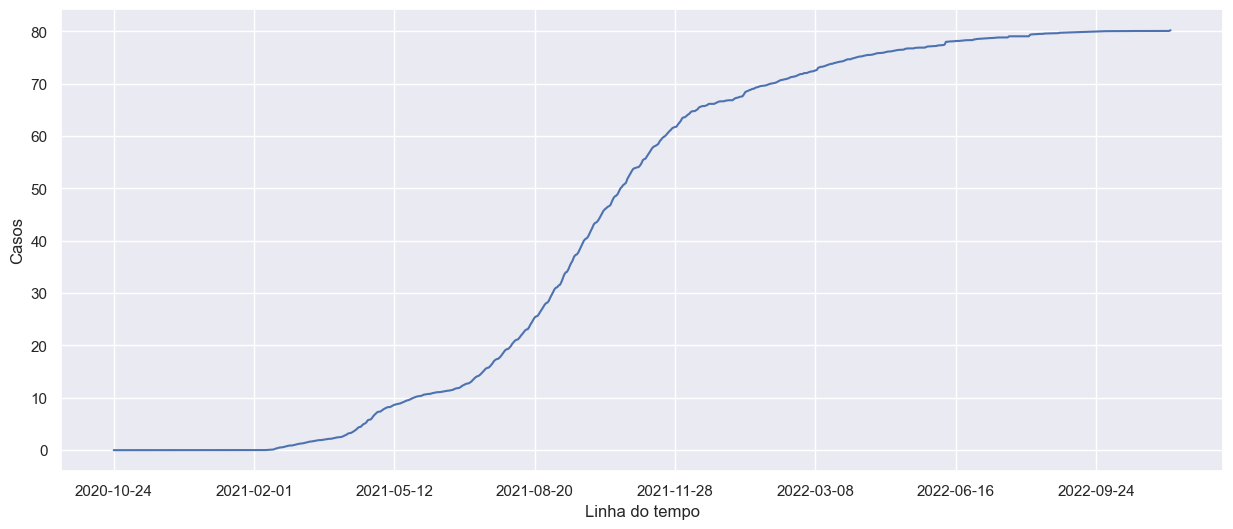

In [31]:
#verificar as pessoas completamente vacinadas ao longo do tempo
df_casos_pos.people_fully_vaccinated_per_hundred.plot(figsize=(15,6), xlabel = 'Linha do tempo', ylabel = 'Casos');


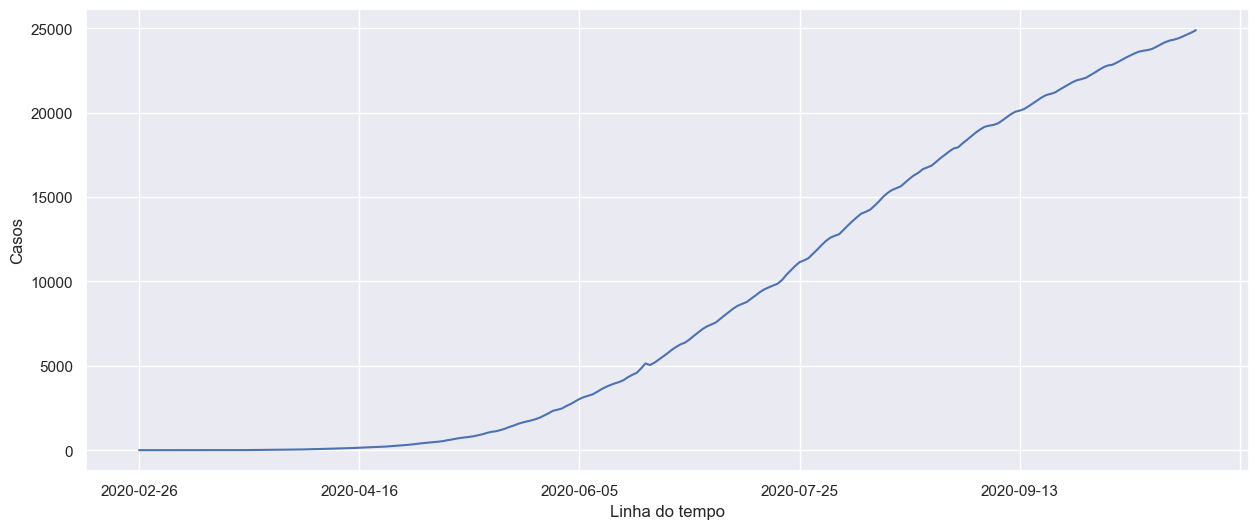

In [32]:
#verificar comportamento da curva de casos antes da vacina
sns.set()
df_casos_pre.total_cases_per_million.plot(figsize=(15,6), xlabel = 'Linha do tempo', ylabel = 'Casos');

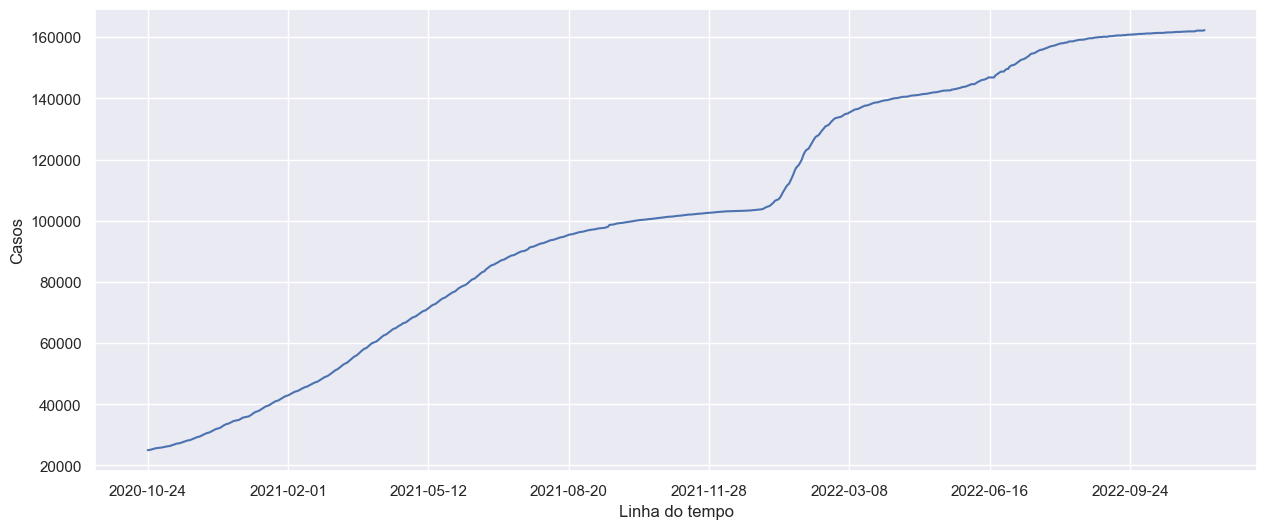

In [33]:
#verificar comportamento da curva de casos depois da vacina
df_casos_pos.total_cases_per_million.plot(figsize=(15,6), xlabel = 'Linha do tempo', ylabel = 'Casos');

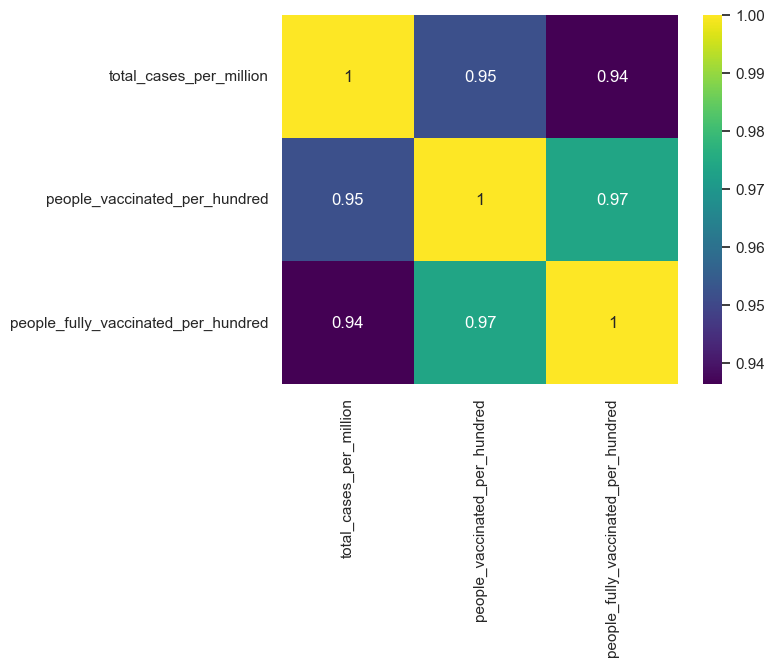

In [34]:
sns.heatmap(df_casos.loc[:,('total_cases_per_million', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred')].corr(), cmap='viridis', annot=True,);

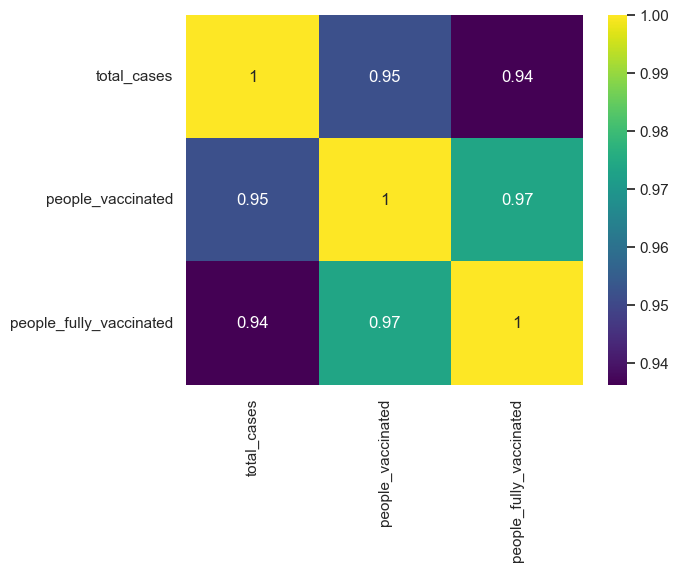

In [35]:
sns.heatmap(df_casos.loc[:,('total_cases', 'people_vaccinated', 'people_fully_vaccinated')].corr(), cmap='viridis', annot=True,);

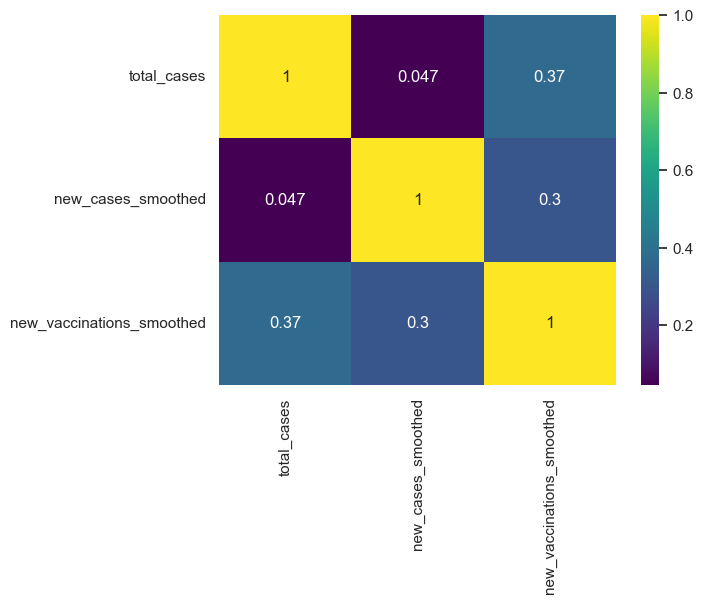

In [36]:
sns.heatmap(df_casos.loc[:,('total_cases', 'new_cases_smoothed', 'new_vaccinations_smoothed')].corr(), cmap='viridis', annot=True,);

#Preparando os dados

In [37]:
df_1 = df.loc[:, ['location', 'date', 'total_cases']].loc[df.location == 'Brazil']
df_2 = df.loc[:, ['location', 'date', 'total_deaths']].loc[df.location == 'Brazil'].loc[df.total_deaths.notnull()]

In [38]:
total_casos = df_1.loc[:, ['total_cases']]
total_mortes = df_2.loc[:, ['total_deaths']]

#Modelo Matemático

In [39]:
# Função Arco tangente
def modelo(x, a, b, c, d):
  argumento = [b*(x-c)]
  valor = a*np.arctan(argumento) + d
  return valor[0]

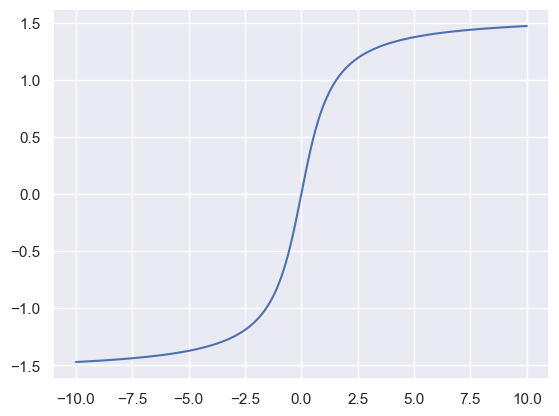

In [40]:
#Gráfico do Modelo
x = np.linspace(-10, 10, 1000)
y = modelo(x, 1, 1, 0, 0)
plt.plot(x, y)
plt.show()

#Entendendo os parâmetros da função

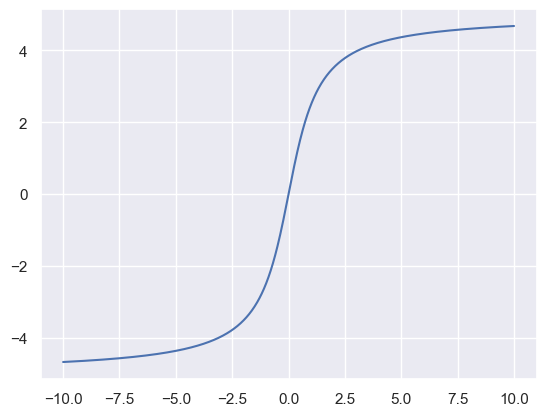

In [41]:
#Parâmetro a: altura da função sobre pi
x_a = np.linspace(-10, 10, 1000)
p_a = 10/np.pi
y_a = modelo(x_a, p_a, 1, 0, 0)
plt.plot(x_a, y_a)
plt.show()

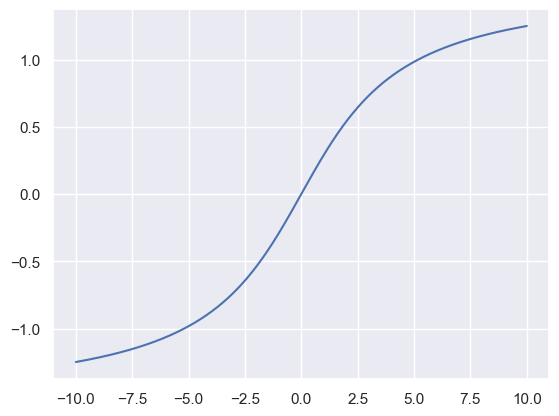

In [42]:
#Parâmetro b: derivada da função no ponto de inflecção dividido pelo parâmetro a
x_b = np.linspace(-10, 10, 1000)
y_b = modelo(x_b, 1, 0.3, 0, 0)
plt.plot(x_b, y_b)
plt.show()

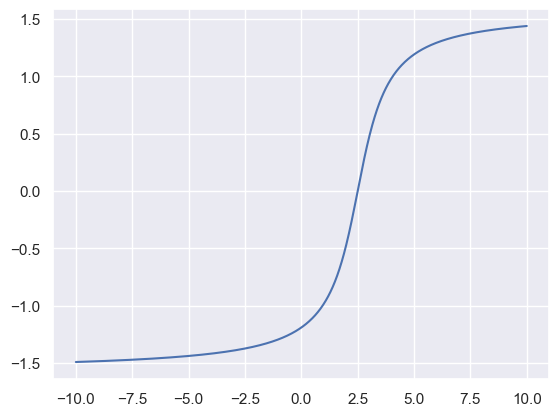

In [43]:
#Parâmetro c: absissa do ponto de inflecção
x_c = np.linspace(-10, 10, 1000)
y_c = modelo(x_c, 1, 1, 2.5, 0)
plt.plot(x_c, y_c)
plt.show()

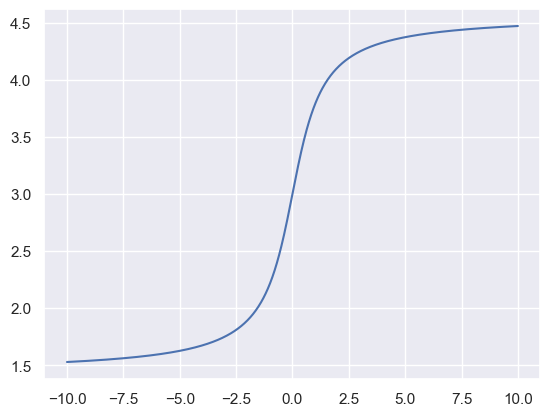

In [44]:
#Parâmetro d: ordenada do ponto de inflecção
x_d = np.linspace(-10, 10, 1000)
y_d = modelo(x, 1, 1, 0, 3)
plt.plot(x_d, y_d)
plt.show()

In [45]:
# Função para extrair os valores dos indices e dos parametros
def extrair(data, column):
  indice_inicial = int(data.first_valid_index())
  indice_final = int(data.last_valid_index())
  parametro_a = (data.loc[indice_final,column]-data.loc[indice_inicial,column])/np.pi
  parametro_b = ((data.loc[indice_final,column]-data.loc[indice_inicial,column])/(indice_final - indice_inicial))/parametro_a
  parametro_c = int((indice_inicial+indice_final)/2)
  parametro_d = int(data.loc[parametro_c,column]/2)
  return indice_inicial, indice_final, parametro_a, parametro_b, parametro_c, parametro_d

#Método de Otimização - Mínimos Quadrados

In [46]:
# Conjunto de valores experimentais 
x_m = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_m = np.array([0.9, 2.3, 3.2, 3.8, 5, 6.2, 7, 7.7, 9.1, 10])

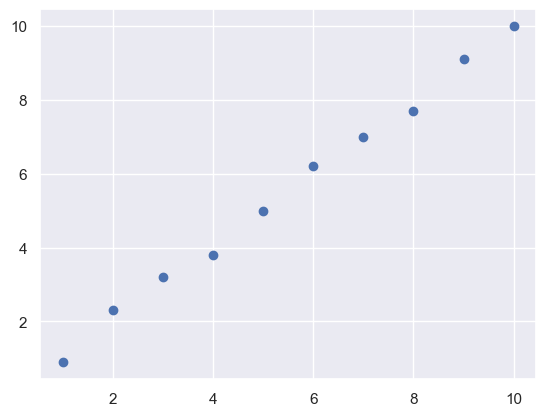

In [47]:
#Gráfico dos valores experimentais
plt.scatter(x_m, y_m)
plt.show()

In [48]:
# Definindo o modelo
def afim(x, a, b):
  return a*x + b

In [49]:
#Fit da curva: escolha dos parâmetros que minimizam o funcional quadrado da distância
popt_m, pcov_m = curve_fit(afim, x_m, y_m, p0=[2,1])

In [50]:
#Parametros otimizados
popt_m

array([0.98666667, 0.09333333])

In [51]:
#Matriz de covariância: Erro associado aos parâmetros otimizados
pcov_m

array([[ 0.00045657, -0.00251111],
       [-0.00251111,  0.01757776]])

<function matplotlib.pyplot.show(close=None, block=None)>

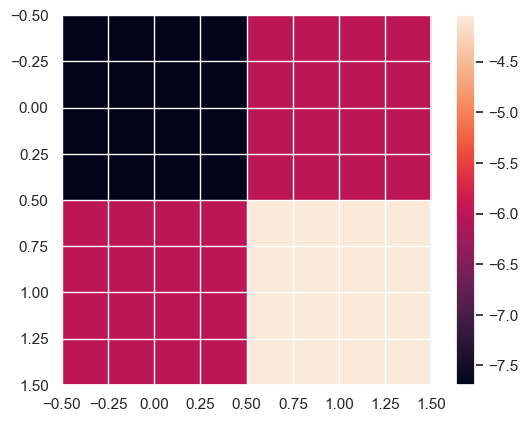

In [52]:
#Gráfico do erro na matriz de covariância em escala logaritmica
plt.imshow(np.log(abs(pcov_m)))
plt.colorbar()
plt.show

In [53]:
#Preparar o gráfico da função do modelo
a_m, b_m = popt_m
x_model_m = np.linspace(min(x_m), max(x_m), 100)
y_model_m = afim(x_model_m, a_m, b_m)

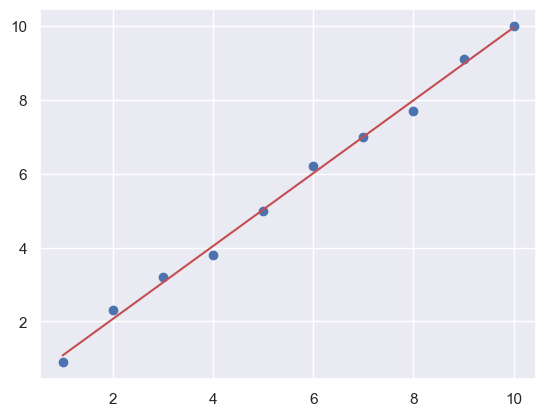

In [54]:
#Gráfico Comparando os valores retirados dos dados contra os valores do modelo
plt.scatter(x_m, y_m)
plt.plot(x_model_m, y_model_m, 'r')
plt.show()

#Número de Casos Totais

In [55]:
#Extração dos parâmetros de trabalho
in_i_casos, in_f_casos, a_casos, b_casos, c_casos, d_casos = extrair(total_casos, 'total_cases')

In [56]:
# Número de casos
x_numero_de_casos = [x for x in range(in_i_casos,in_f_casos+1)]
y_numero_de_casos = [total_casos.loc[i,'total_cases'] for i in range(in_i_casos,in_f_casos+1)]

In [57]:
# Método - Mínimos quadrados
popt_numero_de_casos, pcov_numero_de_casos = curve_fit(modelo, x_numero_de_casos, y_numero_de_casos, p0=[a_casos, b_casos, c_casos, d_casos])

In [58]:
#Parâmetros otimizados
popt_numero_de_casos

array([2.32677804e+07, 2.08080532e-03, 2.92251889e+04, 1.71707065e+07])

In [59]:
#A matriz de covariância
pcov_numero_de_casos

array([[ 2.58826126e+11, -3.05182530e+01,  3.03568313e+03,
         1.27932032e+08],
       [-3.05182530e+01,  3.65420027e-09, -3.32465129e-07,
        -1.40112076e-02],
       [ 3.03568313e+03, -3.32465129e-07,  1.56609161e+01,
         5.87935956e+05],
       [ 1.27932032e+08, -1.40112076e-02,  5.87935956e+05,
         2.30929568e+10]])

<function matplotlib.pyplot.show(close=None, block=None)>

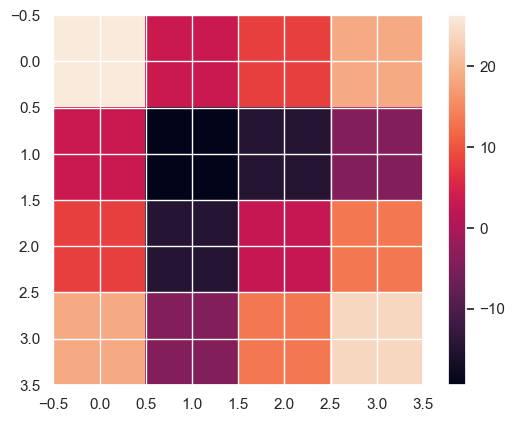

In [60]:
#Gráfico do erro na matriz de covariância
plt.imshow(np.log(abs(pcov_numero_de_casos)))
plt.colorbar()
plt.show

In [61]:
#Preparar o gráfico
a_opt_casos, b_opt_casos, c_opt_casos, d_opt_casos = popt_numero_de_casos
x_model_casos = np.linspace(min(x_numero_de_casos), max(x_numero_de_casos), 1000)
y_model_casos = modelo(x_model_casos, a_opt_casos, b_opt_casos, c_opt_casos, d_opt_casos)

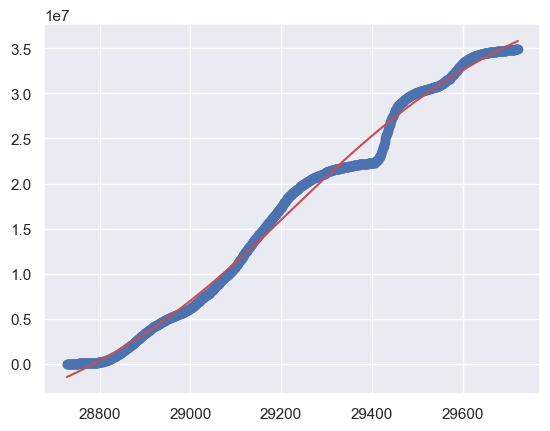

In [62]:
#Gráfico Comparando os valores retirados dos dados contra os valores do modelo
plt.scatter(x_numero_de_casos, y_numero_de_casos)
plt.plot(x_model_casos, y_model_casos, 'r')
plt.show()

#Número de Mortes

In [63]:
#Extração dos parâmetros de trabalho
in_i_mortes, in_f_mortes, a_mortes, b_mortes, c_mortes, d_mortes = extrair(total_mortes, 'total_deaths')

In [64]:
# Número de mortes
x_numero_de_mortes = [x for x in range(in_i_mortes,in_f_mortes+1)]
y_numero_de_mortes = [total_mortes.loc[i,'total_deaths'] for i in range(in_i_mortes,in_f_mortes+1)]

In [65]:
# Método - Mínimos quadrados
popt_numero_de_mortes, pcov_numero_de_mortes = curve_fit(modelo, x_numero_de_mortes, y_numero_de_mortes, p0=[a_mortes, b_mortes, c_mortes, d_mortes])

In [66]:
#Parâmetros otimizados
popt_numero_de_mortes

array([2.55414217e+05, 7.51084286e-03, 2.91266320e+04, 3.46373590e+05])

In [67]:
#A matriz de covariância
pcov_numero_de_mortes

array([[ 2.27971626e+06, -1.54819928e-01, -6.01599433e+02,
        -7.65354954e+05],
       [-1.54819928e-01,  1.26819834e-08,  3.38916342e-05,
         4.30507790e-02],
       [-6.01599433e+02,  3.38916342e-05,  1.22412870e+00,
         9.36680195e+02],
       [-7.65354954e+05,  4.30507790e-02,  9.36680195e+02,
         1.10861636e+06]])

<function matplotlib.pyplot.show(close=None, block=None)>

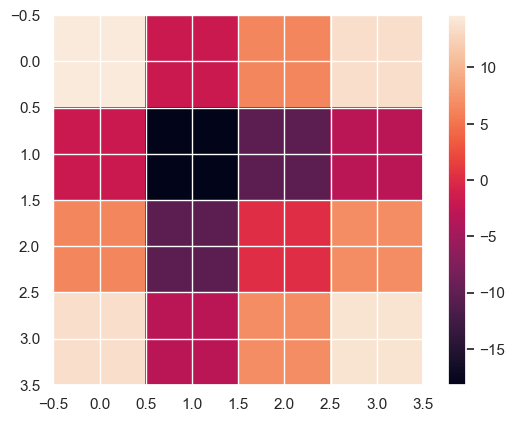

In [68]:
#Gráfico do erro na matriz de covariância
plt.imshow(np.log(abs(pcov_numero_de_mortes)))
plt.colorbar()
plt.show

In [69]:
#Preparar o gráfico
a_opt_mortes, b_opt_mortes, c_opt_mortes, d_opt_mortes = popt_numero_de_mortes
x_model_mortes = np.linspace(min(x_numero_de_mortes), max(x_numero_de_mortes), 1000)
y_model_mortes = modelo(x_model_mortes, a_opt_mortes, b_opt_mortes, c_opt_mortes, d_opt_mortes)

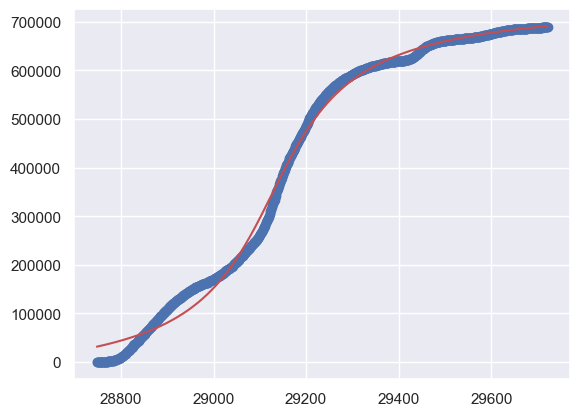

In [70]:
#Gráfico Comparando os valores retirados dos dados contra os valores do modelo
plt.scatter(x_numero_de_mortes, y_numero_de_mortes)
plt.plot(x_model_mortes, y_model_mortes, 'r')
plt.show()